In [ ]:
import os, getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
_set_env("TAVILY_KEY")

TAVILY_KEY: ··········


In [ ]:
pip install tavily-python

In [ ]:
import re
import requests
def check_indigo(question):
    return not re.search(r"\b(spicejet|air india|vistara|emirates|airasia)\b", question.lower())
def indigo(question):
    if not check_indigo(question):
        return "I can only answer questions about Indigo Airlines."
    # To install: pip install tavily-python
    from tavily import TavilyClient
    client = TavilyClient("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")
    response = client.search(
      query=question,
      include_raw_content="text",
      include_domains=["https://www.goindigo.in/"]
    )
    return response
question = input("Ask a question about Indigo Airlines: ")
print(indigo(question))

Ask a question about Indigo Airlines: Baggage Policy
{'query': 'Baggage Policy', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.goindigo.in/information/baggage-policy.html', 'title': 'Baggage Policy - IndiGo', 'content': 'For all international travel, maximum weight allowed in each piece of Checked-in Baggage is 32 (thirty-two) kg.', 'score': 0.6721816, 'raw_content': None}, {'url': 'https://www.goindigo.in/information/itinerary-information.html', 'title': 'Terms and Conditions for Online Flight Booking - IndiGo', 'content': 'Free checked-in baggage allowance for domestic flights - 15kg per person (1 piece only) effective Oct 1st, 2020. For Double or MultiSeats bookings, extra 10 kg.', 'score': 0.54956865, 'raw_content': None}, {'url': 'https://www.goindigo.in/add-on-services/excess-baggage.html', 'title': 'Pre-Book Excess Baggage: Domestic & International - IndiGo', 'content': 'Domestic · Note: Check-in Baggage: 15kg per person (1 piece onl

In [ ]:
import re
import requests
def check_indigo(question):
    return not re.search(r"\b(spicejet|air india|vistara|emirates|airasia)\b", question.lower())
def indigo(question):
    if not check_indigo(question):
        return "I can only answer questions about Indigo Airlines."
    # To install: pip install tavily-python
    from tavily import TavilyClient
    client = TavilyClient("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")
    response = client.search(
      query=question,
      search_depth="advanced",
      include_raw_content="text",
      include_domains=["https://www.goindigo.in/"]
    )
    return response
question = input("Ask a question about Indigo Airlines: ")
print(indigo(question))

Ask a question about Indigo Airlines: Distance between Bangalore and Chennai
{'query': 'Distance between Bangalore and Chennai', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.goindigo.in/domestic-flights/bengaluru-to-chennai-flights.html', 'title': 'Bengaluru to Chennai flights', 'content': "IndiGo's short-haul connectivity has lured passengers to consider these flights to fly to and from these two cities located in a short distance of about 260 km, which initially were only linked via road and railway.\nThe best deals on IndiGo for Bengaluru to Chennai (BLR-MAA) flights\nIndiGo offers daily flights from Bengaluru to Chennai, which may take up to 1 hour and 10 minutes to reach the destination. [...] Explore My trips Book Check-in Profile\n\nHome\nFlights\nDomestic Flights\nBengaluru to Chennai Flights\n\nBengaluru to Chennai Flights\nFly hassle-free from Bengaluru to Chennai with IndiGo and stay updated with real-time flight tracker. Experi

In [ ]:
import os, getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
_set_env("WEATHER_API_KEY")

WEATHER_API_KEY: ··········


In [ ]:
def check_weather(weather,city1,city2):
  info=weather["current"]["weather_descriptions"][0].lower()
  if info in ["storm", "snow", "blizzard", "heavy rain", "fog"]:
    return (f"Weather in {city2} is {info}. Not safe to travel from {city1} to {city2}")
  else:
    return (f"Weather in {city2} is {info}. Safe to travel from {city1} to {city2}")

city1=input("Enter the first city: ")
city2=input("Enter the second city: ")
weather=requests.get(f"https://api.weatherstack.com/current?access_key=3b17ef11f88b56e8fe618a6afe71bd0d&query={city2}").json()
print(check_weather(weather,city1,city2))


Enter the first city: Chennai
Enter the second city: Bombay
Weather in Bombay is mist, rain shower. Safe to travel from Chennai to Bombay


In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph langgraph-prebuilt

In [ ]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


In [ ]:
_set_env("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langchain-academy"

LANGSMITH_API_KEY: ··········


In [ ]:
from langchain_openai import ChatOpenAI
import re
import requests
def check_indigo(question: str) -> str:
    "Checks whether the question asked is related to indigo airlines or not"
    return not re.search(r"\b(spicejet|air india|vistara|emirates|airasia)\b", question.lower())
def indigo(question: str) -> str:
    "Answers question regarding indigo airlines"
    if not check_indigo(question):
        return "I can only answer questions about Indigo Airlines."
    from tavily import TavilyClient
    client = TavilyClient("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")
    response = client.search(
      query=question,
      search_depth="advanced",
      include_raw_content="text",
      include_domains=["https://www.goindigo.in/"]
    )
    return response
def check_weather(weather,city):
  "Checks the weather of the destination and determines whether it is safe to fly or not"
  info=weather["current"]["weather_descriptions"][0].lower()
  if info in ["storm", "snow", "blizzard", "heavy rain", "fog"]:
    return (f"Weather in {city} is {info}. Not safe to travel to {city}")
  else:
    return (f"Weather in {city} is {info}. Safe to travel to {city}")

tools = [indigo,check_weather]
llm = ChatOpenAI(model="gpt-3.5-turbo")
llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

In [ ]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage
sys_msg = SystemMessage(content="You are a helpful assistant and have to do 2 tasks: Getting all the information about indigo and checking weather.")
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

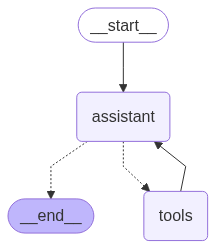

In [ ]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
builder = StateGraph(MessagesState)
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Indigo bagging policy. Ahmedabad Weather")]
for chunk in react_graph.stream({"messages": messages}):
    print(chunk)

{'assistant': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pPQ1lXTbfDYHhuEcP2BZKt9o', 'function': {'arguments': '{"question":"bagging policy"}', 'name': 'indigo'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 114, 'total_tokens': 130, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BpfsMftdPAPxFkt0DVifMYM3WmjKn', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--726a8e2f-9d4b-4373-882a-439fdf3c5d1a-0', tool_calls=[{'name': 'indigo', 'args': {'question': 'bagging policy'}, 'id': 'call_pPQ1lXTbfDYHhuEcP2BZKt9o', 'type': 'tool_call'}], usage_metadata={'input_tokens': 114, 'output_tokens': 16, 'total_tokens': 130

BadRequestError: Error code: 400 - {'error': {'message': "This model's maximum context length is 16385 tokens. However, your messages resulted in 47926 tokens (47855 in the messages, 71 in the functions). Please reduce the length of the messages or functions.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}

In [ ]:
messages = [HumanMessage(content="Indigo bagging policy. Ahmedabad Weather")]
response = react_graph.invoke({"messages": messages})


RateLimitError: Error code: 429 - {'error': {'message': 'Request too large for gpt-4o in organization org-Y0IuQ7siruHlMUnucD8bX8AU on tokens per min (TPM): Limit 30000, Requested 75345. The input or output tokens must be reduced in order to run successfully. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}

In [ ]:
for m in messages['messages']:
    m.pretty_print()

TypeError: list indices must be integers or slices, not str